<a href="https://colab.research.google.com/github/Archana-2024/Big-data-analysis-using-Dask/blob/main/Big_data_analysis_using_dask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import dask.dataframe as dd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df = dd.read_csv("/content/DataCoSupplyChainDataset.csv",encoding="latin1",assume_missing=True)


In [4]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3.0,4.0,91.250000,314.640015,Advance shipping,0.0,73.0,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,2/3/2018 22:56,Standard Class
1,TRANSFER,5.0,4.0,-249.089996,311.359985,Late delivery,1.0,73.0,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/18/2018 12:27,Standard Class
2,CASH,4.0,4.0,-247.779999,309.720001,Shipping on time,0.0,73.0,Sporting Goods,San Jose,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/17/2018 12:06,Standard Class
3,DEBIT,3.0,4.0,22.860001,304.809998,Advance shipping,0.0,73.0,Sporting Goods,Los Angeles,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/16/2018 11:45,Standard Class
4,PAYMENT,2.0,4.0,134.210007,298.250000,Advance shipping,0.0,73.0,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/15/2018 11:24,Standard Class


In [5]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [6]:
df.isnull().sum().compute()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [7]:
df.info()

<class 'dask_expr.DataFrame'>
Columns: 53 entries, Type to Shipping Mode
dtypes: float64(29), string(24)

In [9]:
df['Customer Lname'] = df['Customer Lname'].fillna('')

In [10]:
df = df.drop(['Customer Zipcode', 'Order Zipcode', 'Product Description'],axis=1)

In [11]:
df.shape

(<dask_expr.expr.Scalar: expr=(Drop(frame=Assign(frame=Assign(frame=ArrowStringConversion(frame=FromMapProjectable(af0a06c)))), columns=['Customer Zipcode', 'Order Zipcode', 'Product Description'])).size() // 50, dtype=int64>,
 50)

In [12]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [13]:

df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3.0,4.0,91.250000,314.640015,Advance shipping,0.0,73.0,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360.0,73.0,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,2/3/2018 22:56,Standard Class
1,TRANSFER,5.0,4.0,-249.089996,311.359985,Late delivery,1.0,73.0,Sporting Goods,Caguas,...,Rajastán,PENDING,1360.0,73.0,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/18/2018 12:27,Standard Class


In [14]:
df['Customer Name']=df['Customer Fname']+' '+df['Customer Lname']

In [15]:
df = df.drop(['Customer Fname', 'Customer Lname'],axis=1)

In [16]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Name
0,DEBIT,3.0,4.0,91.250000,314.640015,Advance shipping,0.0,73.0,Sporting Goods,Caguas,...,COMPLETE,1360.0,73.0,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,2/3/2018 22:56,Standard Class,Cally Holloway
1,TRANSFER,5.0,4.0,-249.089996,311.359985,Late delivery,1.0,73.0,Sporting Goods,Caguas,...,PENDING,1360.0,73.0,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/18/2018 12:27,Standard Class,Irene Luna


In [17]:
df.info()

<class 'dask_expr.DataFrame'>
Columns: 49 entries, Type to Customer Name
dtypes: float64(26), string(23)

In [18]:
df['order date (DateOrders)'] = dd.to_datetime(df['order date (DateOrders)'], format='%m/%d/%Y %H:%M', errors='coerce')
df['shipping date (DateOrders)'] = dd.to_datetime(df['shipping date (DateOrders)'], format='%m/%d/%Y %H:%M', errors='coerce')



In [19]:
total_orders = df['Order Id'].nunique()
avg_sales_per_order = df['Sales'].mean()
on_time_delivery_rate = (df['Days for shipping (real)'] <= df['Days for shipment (scheduled)']).mean() * 100
most_profitable_product = df.groupby('Product Name')['Order Profit Per Order'].sum().idxmax()
total_customers = df['Customer Id'].nunique()
market_share = df.groupby('Market')['Sales'].sum()
top_region_by_sales = df.groupby('Order Region')['Sales'].sum().idxmax()
avg_discount_rate = df['Order Item Discount Rate'].mean()
total_quantity_sold = df['Order Item Quantity'].sum()
repeat_customer_rate = (df['Customer Id'].value_counts() > 1).mean() * 100

In [20]:
# Compute all Dask Scalar objects
total_orders_value = total_orders.compute()
most_profitable_product_value = most_profitable_product.compute()
total_customers_value = total_customers.compute()
top_region_by_sales_value = top_region_by_sales.compute()
total_quantity_sold_value = total_quantity_sold.compute()
repeat_customer_rate_value = repeat_customer_rate.compute()
on_time_delivery_rate_value = on_time_delivery_rate.compute()  # ✅ Fix applied

# Print with formatted values
print(f"Total Orders: {total_orders_value}")
print(f"On-Time Delivery Rate: {on_time_delivery_rate_value:.2f}%")  # ✅ Fix applied
print(f"Most Profitable Product: {most_profitable_product_value}")
print(f"Total Customers: {total_customers_value}")
print(f"Top Region by Sales: {top_region_by_sales_value}")
print(f"Average Discount Rate: {avg_discount_rate.compute():.2%}")  # Ensure computed
print(f"Total Quantity Sold: {total_quantity_sold_value}")
print(f"Repeat Customer Rate: {repeat_customer_rate_value:.2f}%")



Total Orders: 17790
On-Time Delivery Rate: 40.92%
Most Profitable Product: Perfect Fitness Perfect Rip Deck
Total Customers: 10000
Top Region by Sales: Western Europe
Average Discount Rate: 10.22%
Total Quantity Sold: 77992.0
Repeat Customer Rate: 61.71%


# **Exploratory Data Analysis(EDA)**

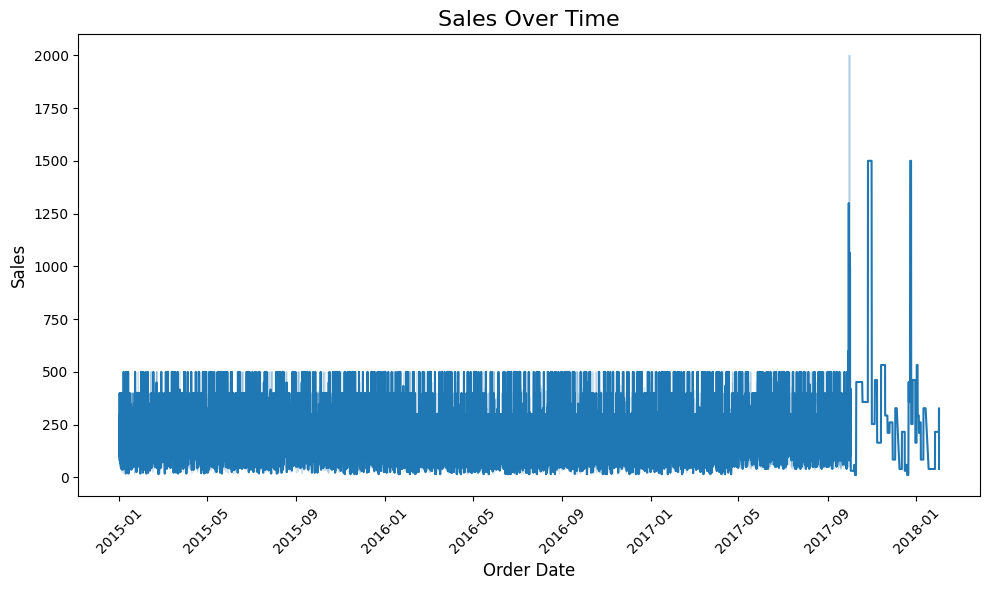

In [22]:
df_sample = df.compute()  # Ensure we have a Pandas DataFrame
# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='order date (DateOrders)', y='Sales', data=df_sample)
plt.title('Sales Over Time', fontsize=16)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As per the graph, sales remained constant until September 2017, increased in October 2017, and then fluctuated between highs and lows.

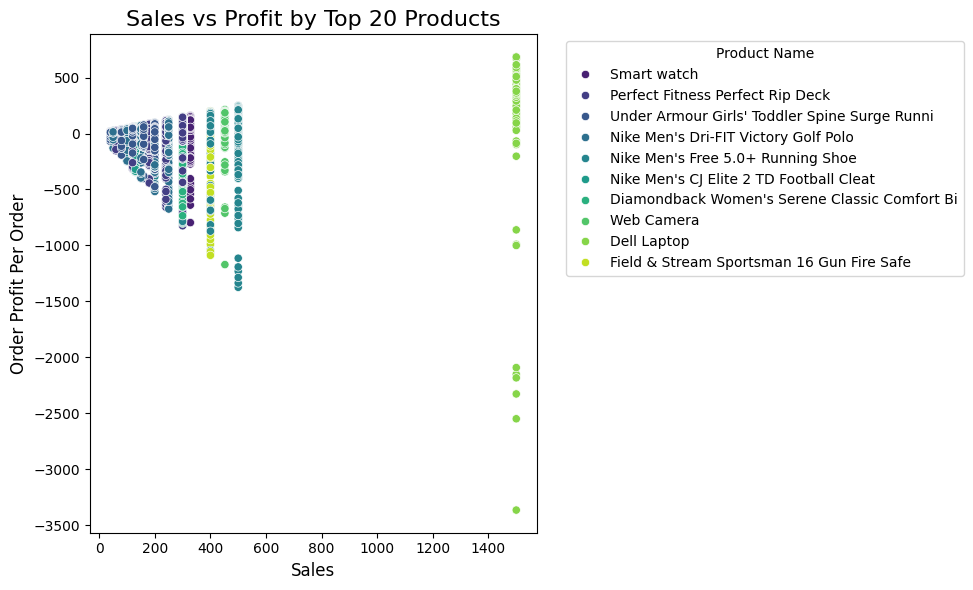

In [23]:
# Compute total sales per product and get the top 20 products
top_10_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).compute().index

# Filter the DataFrame to include only the top 20 products
df_sample = df[df['Product Name'].isin(top_10_products)].compute()

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Order Profit Per Order', hue='Product Name', data=df_sample, palette='viridis')
plt.title('Sales vs Profit by Top 20 Products', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Order Profit Per Order', fontsize=12)
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend
plt.tight_layout()
plt.show()


<ipython-input-24-ed142b74f864>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Product Name', data=top_10_products, palette='Blues_d')


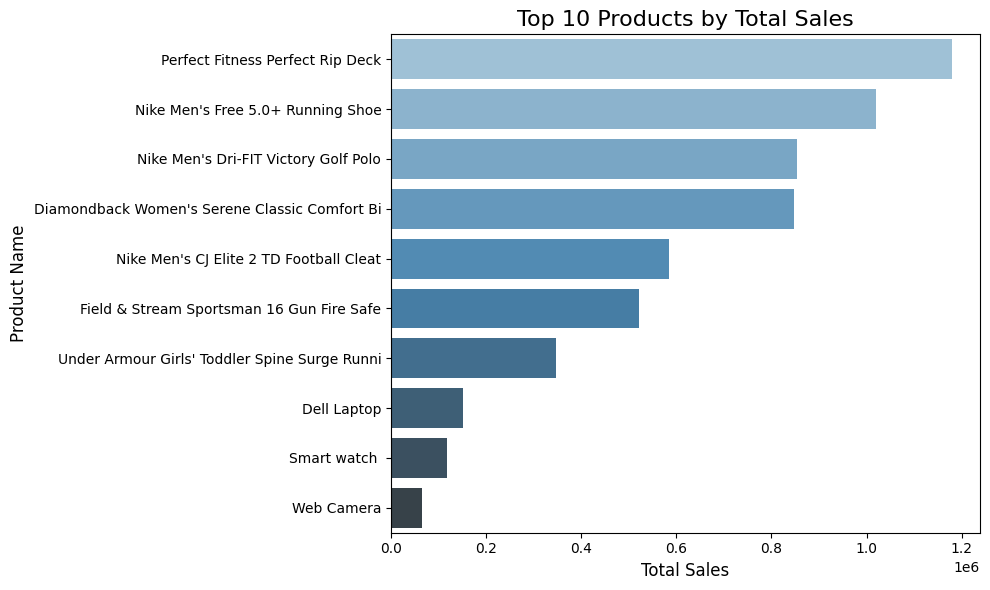

In [24]:


# Aggregate Sales by Product Name
top_10_products = df.groupby('Product Name')['Sales'].sum().compute()  # Convert to Pandas

# Sort and get top 10
top_10_products = top_10_products.sort_values(ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Product Name', data=top_10_products, palette='Blues_d')
plt.title('Top 10 Products by Total Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()


**As per the graph, the product with the highest sales is 'Perfect Fitness Perfect Rip Deck', followed by 'Nike Men's Free 5.0+ Running Shoe'.**


<ipython-input-25-6f3819f47884>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Order Status', y='Count', data=order_status_counts, palette='Set2')


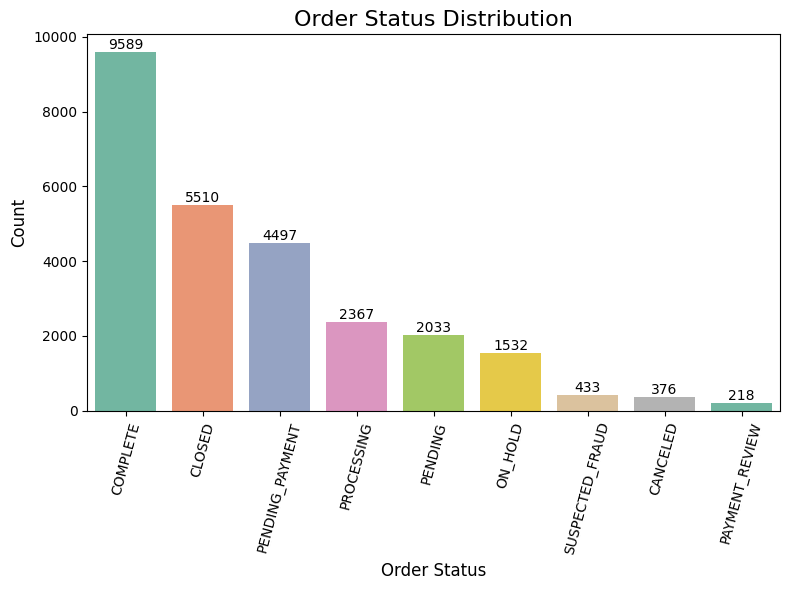

In [25]:
# Get value counts
order_status_counts = df_sample['Order Status'].value_counts().reset_index()
order_status_counts.columns = ['Order Status', 'Count']

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Order Status', y='Count', data=order_status_counts, palette='Set2')

# Add count labels on top of bars
for i, row in order_status_counts.iterrows():
    ax.text(i, row['Count'] + 1, row['Count'], ha='center', va='bottom', fontsize=10)

plt.title('Order Status Distribution', fontsize=16)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


**There are 5187 complete orders,3671 closed orders and 1833 orders are in processing state.**

<ipython-input-26-adc86c20a562>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Order Region', data=sales_by_region, palette='Greens_d')


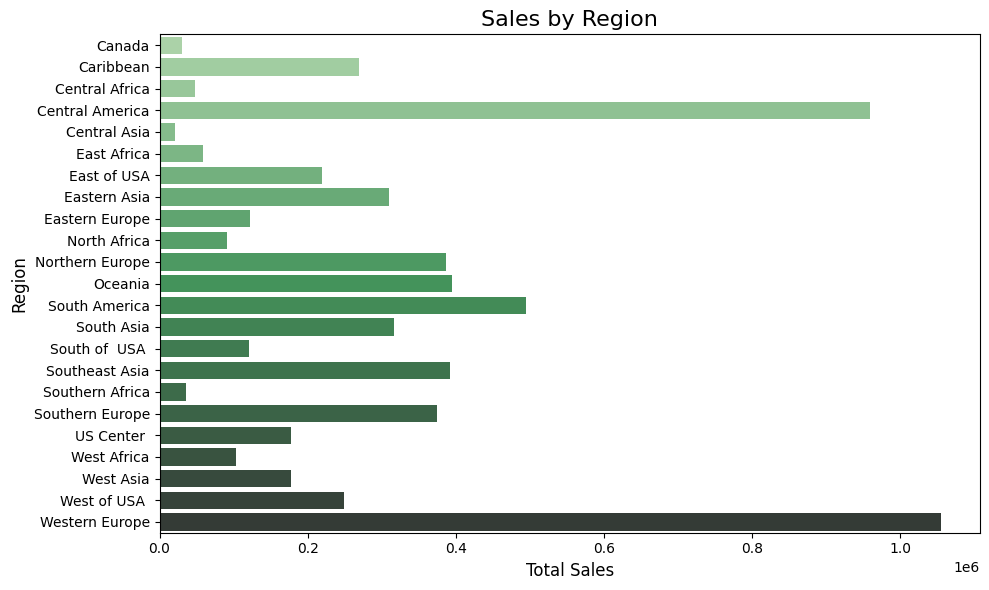

In [26]:
sales_by_region = df.groupby('Order Region')['Sales'].sum().compute().reset_index()  # Convert to Pandas

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Order Region', data=sales_by_region, palette='Greens_d')
plt.title('Sales by Region', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()

**From above graph we can observed that highest sales is in western Europe Region and lowest is in Central Asia.**

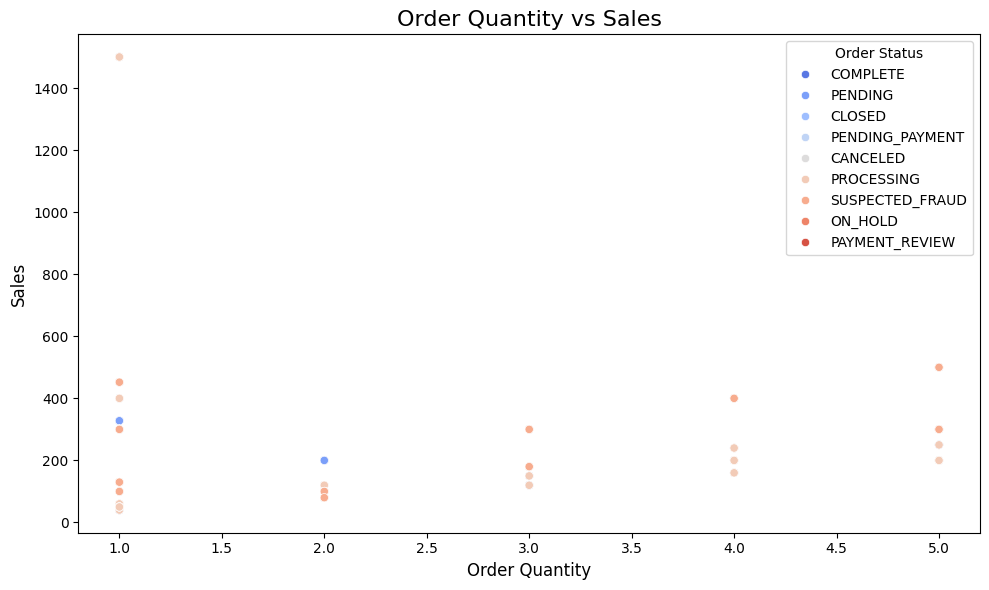

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order Item Quantity', y='Sales', data=df_sample, hue='Order Status', palette='coolwarm')
plt.title('Order Quantity vs Sales', fontsize=16)
plt.xlabel('Order Quantity', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.tight_layout()
plt.show()

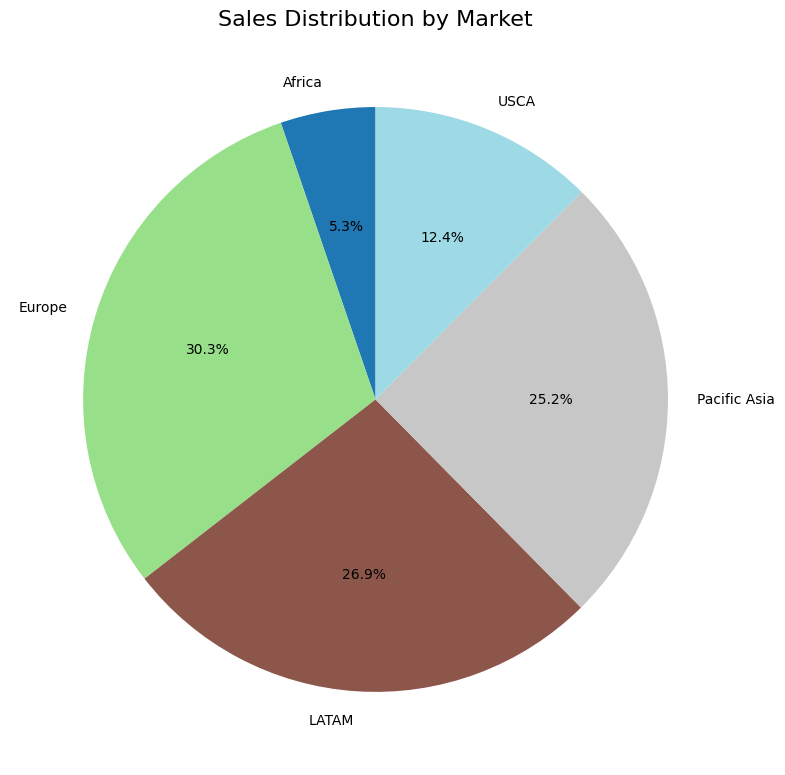

In [28]:
sales_by_market = df.groupby('Market')['Sales'].sum().compute()  # Convert to Pandas

# Plot
plt.figure(figsize=(8, 8))
sales_by_market.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title('Sales Distribution by Market', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

<ipython-input-29-5f8986f187e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Order Region', y='Order Profit Per Order', data=df_sample, palette='Set2')


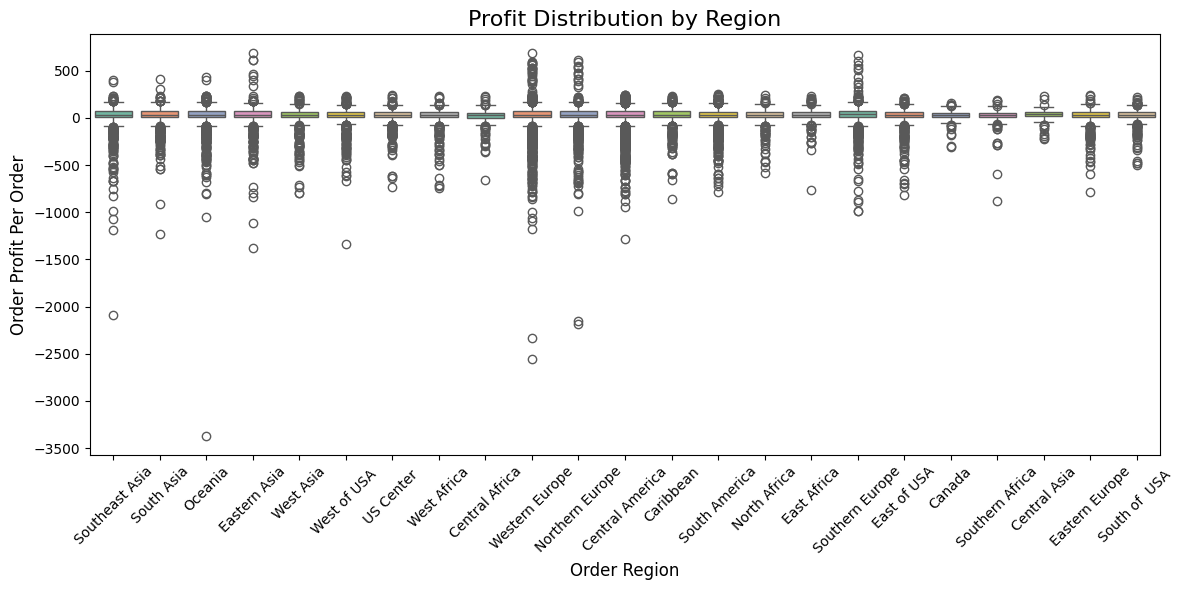

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Order Region', y='Order Profit Per Order', data=df_sample, palette='Set2')
plt.title('Profit Distribution by Region', fontsize=16)
plt.xlabel('Order Region', fontsize=12)
plt.ylabel('Order Profit Per Order', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()